# Economic data for equity premium prediction
In this notebook, we gather the economic data used in two papers:

1. Welch, I., & Goyal, A. (2008). A Comprehensive Look at The Empirical Performance of Equity Premium Prediction. Review of Financial Studies, 21(4), 1455–1508. https://doi.org/10.1093/rfs/hhm014

2. Rapach, D. E., Strauss, J. K., & Zhou, G. (2010). Out-of-Sample Equity Premium Prediction: Combination Forecasts and Links to the Real Economy. The Review of Financial Studies, 23(2), 821–862. https://doi.org/10.1093/rfs/hhp063

A complete list of the data is shown below:

1. [Dividend Price Ratio](##dividend-price-ratio)
2. [Dividend Yield](##dividend-yield)
3. [Earnings Price Ratio](##earnings-price-ratio)
4. [Dividend Payout Ratio](#dividend-payout-ratio)
5. [Stock Variance](##stock-variance)
6. [Book-to-Market Ratio](##book-to-market-ratio)
7. [Net Equity Expansion](##net-equity-expansion)
8.  [Treasury Bills](##treasury-bill)
9.  [Long Term Yield](##long-term-yield)
10. [Long Term return](##long-term-return)
11. [Term spread](##term-spread)
12. [Default yield spread](##default-yield-spread)
13. [Default return spread](##default-return-spread)
14. [Inflation](##inflation)
15. [Investment-to-capital ratio](##investment-to-capital-ratio)

What's more, the dependent variables for both papers is the equity premium. It is calculated from [S&P 500 index returns](##s&p-500-index-returns) and [Treasury-bill rate](##treasury-bill).

The second paper (Rapach 2010) considers the quarterly data from 1947/01 to 2005/04. This notebook gather the monthly data for each variable. All data above are gathered from [Amit Goyal personal website](https://sites.google.com/view/agoyal145/).

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sys
sys.path.append('../module')
from data_handler import get_monthly_date_format
%matplotlib inline

In [5]:
data = pd.read_csv('../../data/econ_predictors_monthly_2021_Amit_Goyal.csv', index_col=0)
data.index = [get_monthly_date_format(str(x), {'format':'%Y%m'}) for x in data.index]
data.tail()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
2021-08,"4,522.68",58.7913,169.8333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
2021-09,"4,307.54",59.2545,175.3700,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
2021-10,"4,605.38",59.6354,182.8600,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627
2021-11,"4,567.00",60.0162,190.3500,0.189455,0.0005,0.0262,0.0328,0.0156,0.015640,0.0001,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008665
2021-12,"4,766.18",60.3971,197.8400,0.179786,0.0006,0.0265,0.0330,0.0146,0.012970,0.0000,0.003073,-0.0110,-0.0129,0.002518,NaN,0.043485,0.042285


In [25]:
START_DATE = '1947-01'
END_DATE = '2005-04'
econ_data = data[START_DATE:END_DATE]

## S&P 500 index returns

The equity premium is the total rate of return on the stock market minus the prevailing short-term interest rate.

$$
\begin{equation}
\text{equity premium} = \frac{P_t - P_{t-1}}{P_{t-1}} - r_f
\end{equation}
$$

<AxesSubplot: title={'center': 'equity premium'}>

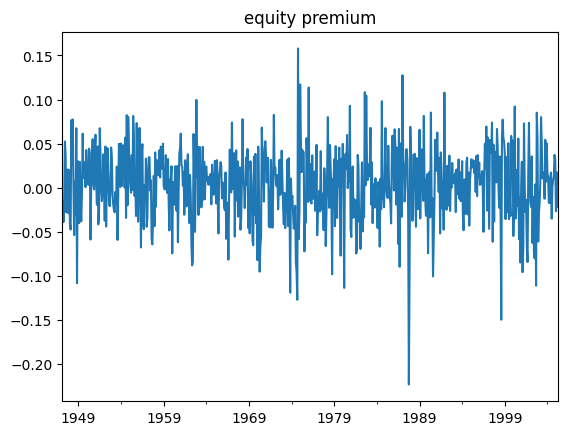

In [92]:
equity_price = econ_data['Index'].apply(lambda x: re.sub(r'[^\w\s|.]', '', x))
equity_price = equity_price.astype(float)
equity_return = equity_price.pct_change()
equity_premium = equity_return - econ_data['Rfree']
equity_premium = equity_premium.dropna()
equity_premium.plot(title='equity premium')

## Dividend Price Ratio

The Dividend Price Ratio (d/p) is the difference between the log of dividends and the log of prices.

$$
\begin{equation}
\text{Dividend Price Ratio} = log(D) - log(P)
\end{equation}
$$

<AxesSubplot: title={'center': 'Dividend Price Ratio'}>

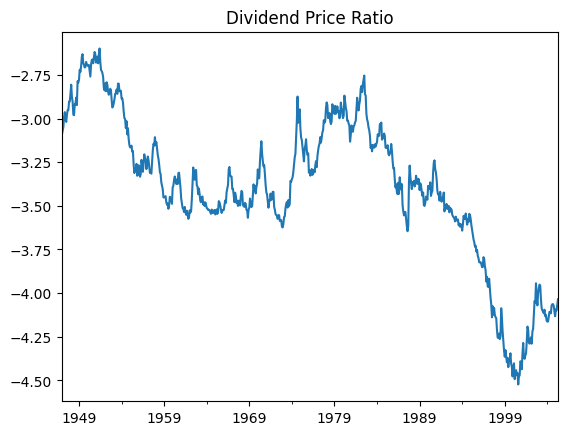

In [93]:
dividend_price_ratio = np.log(econ_data['D12']) - np.log(equity_price)
dividend_price_ratio.plot(title = "Dividend Price Ratio")

## Dividend Yield

The Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices.

\begin{equation}
\text{Dividend Price Ratio} = log(D_t) - log(P_{t-1})
\end{equation}


<AxesSubplot: title={'center': 'Dividend Yield'}>

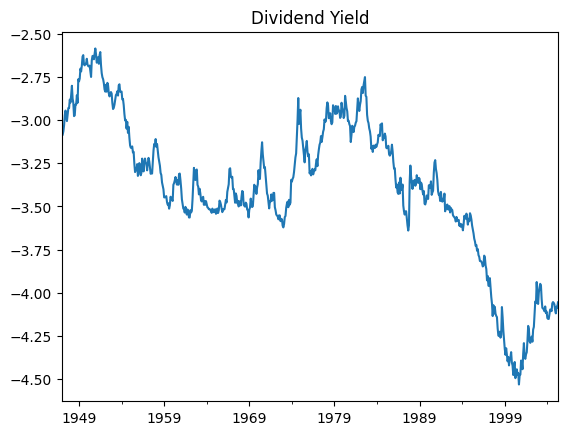

In [96]:
dividend_yield = np.log(econ_data['D12']) - np.log(equity_price.shift(1))
dividend_yield.plot(title = "Dividend Yield")

## Earnings Price Ratio

The Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices.

\begin{equation}
\text{Earnings Price Ratio} = log(E_t) - log(P_{t})
\end{equation}

<AxesSubplot: title={'center': 'Earnings Price Ratio'}>

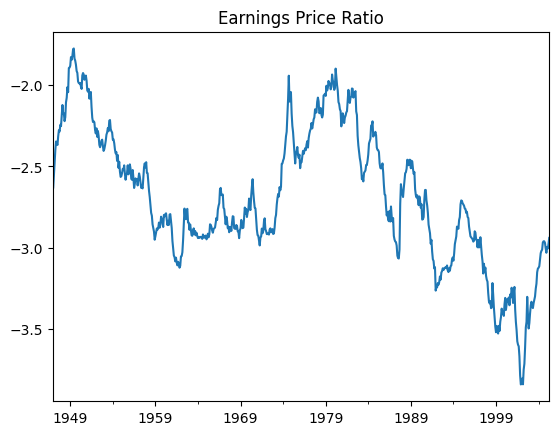

In [98]:
earnings_price_ratio = np.log(econ_data['E12']) - np.log(equity_price)
earnings_price_ratio.plot(title = "Earnings Price Ratio")

## Dividend Payout Ratio

The Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.

\begin{equation}
\text{Earnings Payout Ratio} = log(D_t) - log(E_{t})
\end{equation}

<AxesSubplot: title={'center': 'Earnings Payout Ratio'}>

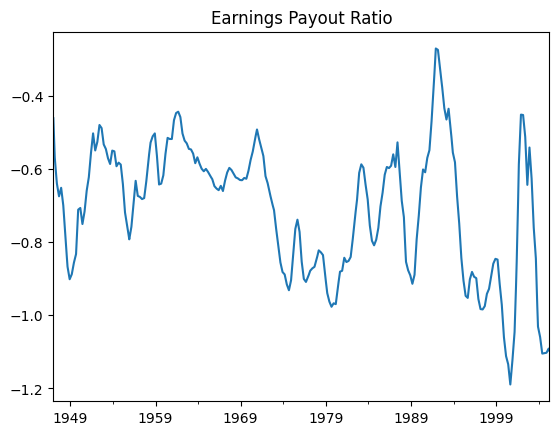

In [99]:
earnings_payout_ratio = np.log(econ_data['D12']) - np.log(econ_data['E12'])
earnings_payout_ratio.plot(title = "Earnings Payout Ratio")

## Stock Variance

Stock Variance is the sum of squared daily returns on the S&P 500.

\begin{equation}
\text{Stock Variance} = \sum_{t=1}^T r_t^2
\end{equation}

<AxesSubplot: title={'center': 'Stock Variance'}>

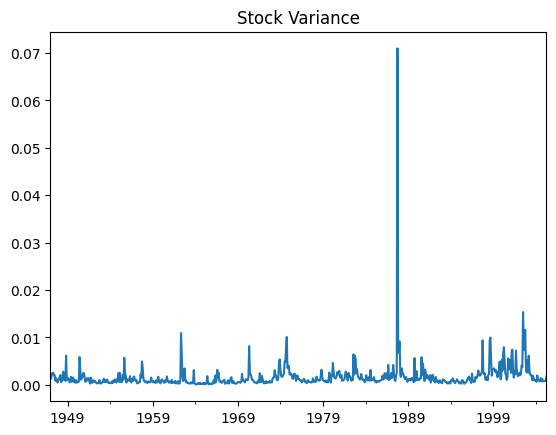

In [101]:
stock_variance = econ_data['svar']
stock_variance.plot(title='Stock Variance')

## Book-to-Market Ratio

The Book-to-Market Ratio (b/m) is the ratio of book value to market value for the Dow Jones Industrial Average.

<AxesSubplot: title={'center': 'Book to Market'}>

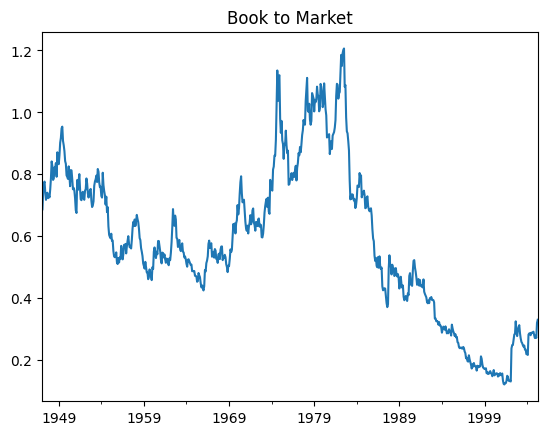

In [102]:
book_to_market = econ_data['b/m']
book_to_market.plot(title='Book to Market')

## Net Equity Expansion

Net Equity Expansion (ntis) is the ratio of 12-month moving sums of net issues by NYSE listed stocks divided by the total end-of-year market capitalization of NYSE stocks.

$$
\begin{equation}
\text { Net Issue }_t=\text { Mcap }_t-\text { Mcap }_{t-1} \times\left(1+\text { vwretx }_t\right)
\end{equation}
$$

<AxesSubplot: title={'center': 'Net Equity Expansion'}>

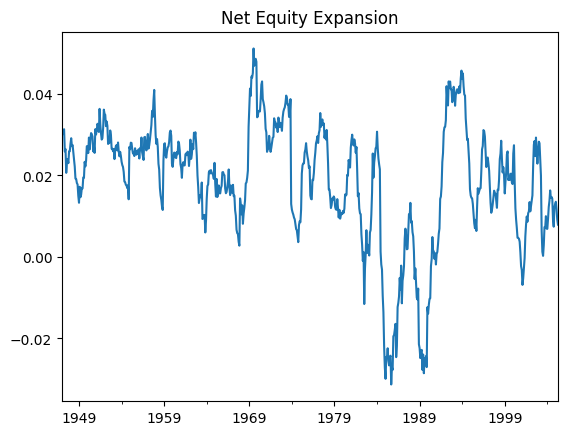

In [103]:
net_equity_expansion = econ_data['ntis']
net_equity_expansion.plot(title='Net Equity Expansion')

## Treasury Bills

Interest rate on a three-month Treasury bill (secondary market)

<AxesSubplot: title={'center': 'three-month Treasury Bills'}>

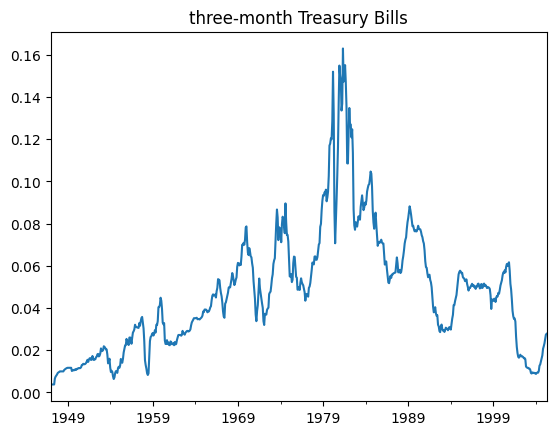

In [104]:
treasury_bill = econ_data['tbl']
treasury_bill.plot(title='three-month Treasury Bills')

## Long Term Yield

Long-term government bond yield.

<AxesSubplot: title={'center': 'Long Term Yield'}>

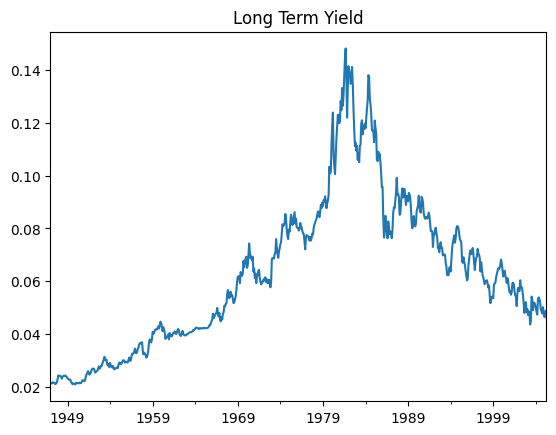

In [106]:
long_term_yield = econ_data['lty']
long_term_yield.plot(title='Long Term Yield')

## Long Term return

Return on long-term government bonds.

<AxesSubplot: title={'center': 'Long Term Return'}>

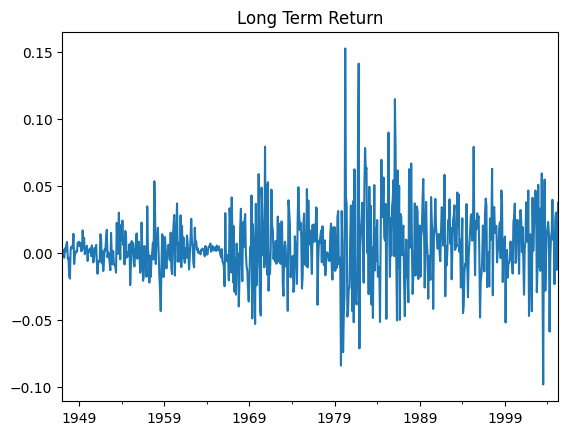

In [108]:
long_term_return = econ_data['ltr']
long_term_return.plot(title='Long Term Return')

## Term spread

Difference between the long-term yield and the Treasury bill rate.

<AxesSubplot: title={'center': 'Term spread'}>

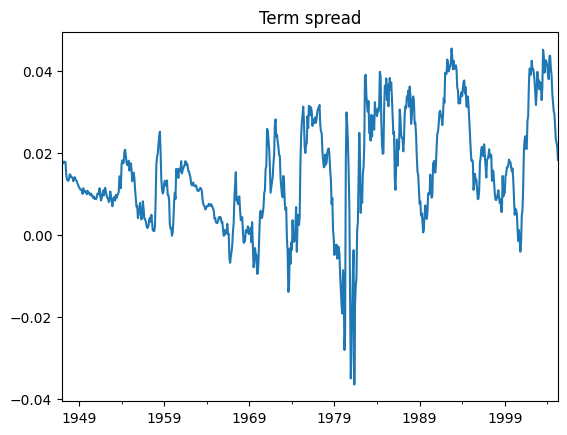

In [109]:
term_spread = long_term_yield - treasury_bill
term_spread.plot(title='Term spread')

## Default yield spread

Difference between BAA- and AAA-rated corporate bond yields.

<AxesSubplot: title={'center': 'Default yield spread'}>

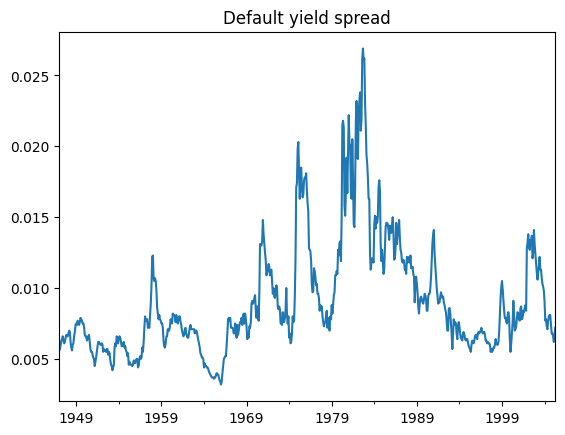

In [114]:
default_yield_spread = econ_data['BAA'] - econ_data['AAA']
default_yield_spread.plot(title='Default yield spread')

## Default return spread

Difference between long-term corporate bond and long-term government bond returns.

<AxesSubplot: title={'center': 'Default return spread'}>

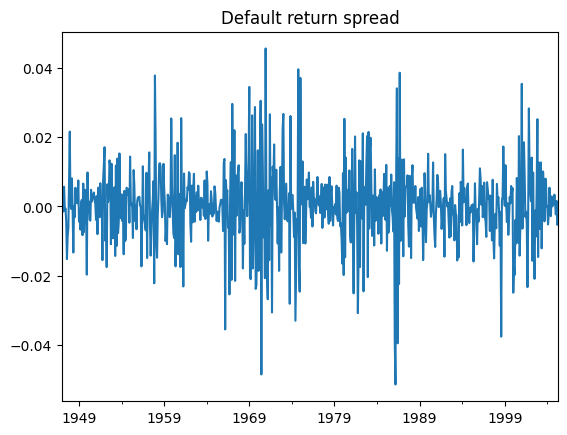

In [116]:
default_return_spread = econ_data['corpr'] - econ_data['ltr']
default_return_spread.plot(title='Default return spread')

## Inflation

Inflation is the Consumer Price Index (All Urban Consumers).

<AxesSubplot: title={'center': 'Inflation'}>

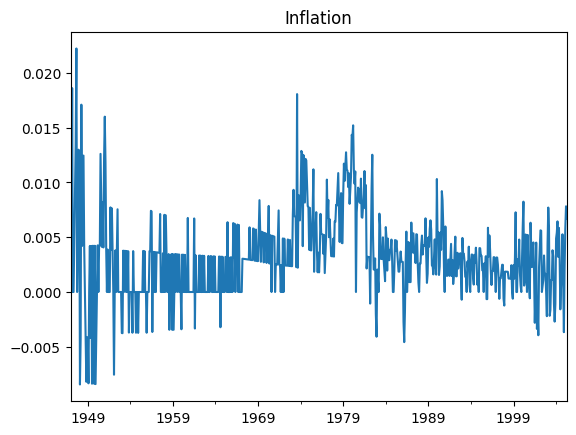

In [118]:
inflation = econ_data['infl']
inflation.plot(title='Inflation')

put every variable togather

In [136]:
econ_predictors = pd.concat([equity_premium, 
                            dividend_price_ratio, 
                            dividend_yield,
                            earnings_price_ratio, 
                            earnings_payout_ratio,
                            stock_variance,
                            book_to_market,
                            net_equity_expansion,
                            treasury_bill,
                            long_term_yield,
                            long_term_return,
                            term_spread,
                            default_yield_spread,
                            default_return_spread, 
                            inflation], axis=1).dropna()
econ_predictors.columns = ['Equity Premium',
                           'Dividend Price Ratio', 
                           'Dividend Yield', 
                           'Earnings Price Ratio',
                           'Earnings Payout Ratio',
                           'Stock Variance',
                           'Book To Market',
                           'Net Equity Expansion',
                           'Treasury Bill',
                           'Long Term Yield',
                           'Long Term Return',
                           'Term Spread',
                           'Default Yield Spread',
                           'Default Return Spread',
                           'Inflation']

wrap up into a function

In [143]:
def get_econ_predictors(data_path:str = '../../data/econ_predictors_monthly_2021_Amit_Goyal.csv',
                        START_DATE:str = '1947-01',
                        END_DATE:str = '2005-04') -> pd.DataFrame:
    '''
    This function returns the economic predictions for the given date range.

    Parameters
    ----------
    data_path : str
    START_DATE : str
    END_DATE : str

    Returns
    -------
    pd.DataFrame 
    '''

    data = pd.read_csv(data_path, index_col=0)
    data.index = [get_monthly_date_format(str(x), {'format':'%Y%m'}) for x in data.index]
    econ_data = data[START_DATE:END_DATE]

    equity_price = econ_data['Index'].apply(lambda x: re.sub(r'[^\w\s|.]', '', x))
    equity_price = equity_price.astype(float)
    equity_return = equity_price.pct_change()
    equity_premium = equity_return - econ_data['Rfree']
    
    dividend_price_ratio = np.log(econ_data['D12']) - np.log(equity_price)

    dividend_yield = np.log(econ_data['D12']) - np.log(equity_price.shift(1))

    earnings_price_ratio = np.log(econ_data['E12']) - np.log(equity_price)

    earnings_payout_ratio = np.log(econ_data['D12']) - np.log(econ_data['E12'])

    stock_variance = econ_data['svar']

    book_to_market = econ_data['b/m']
    
    net_equity_expansion = econ_data['ntis']

    treasury_bill = econ_data['tbl']

    long_term_yield = econ_data['lty']

    long_term_return = econ_data['ltr']

    term_spread = long_term_yield - treasury_bill

    default_yield_spread = econ_data['BAA'] - econ_data['AAA']

    default_return_spread = econ_data['corpr'] - econ_data['ltr']

    inflation = econ_data['infl']

    econ_predictors = pd.concat([equity_premium, 
                            dividend_price_ratio, 
                            dividend_yield,
                            earnings_price_ratio, 
                            earnings_payout_ratio,
                            stock_variance,
                            book_to_market,
                            net_equity_expansion,
                            treasury_bill,
                            long_term_yield,
                            long_term_return,
                            term_spread,
                            default_yield_spread,
                            default_return_spread, 
                            inflation], axis=1).dropna()
                            
    econ_predictors.columns = ['Equity Premium',
                            'Dividend Price Ratio', 
                            'Dividend Yield', 
                            'Earnings Price Ratio',
                            'Earnings Payout Ratio',
                            'Stock Variance',
                            'Book To Market',
                            'Net Equity Expansion',
                            'Treasury Bill',
                            'Long Term Yield',
                            'Long Term Return',
                            'Term Spread',
                            'Default Yield Spread',
                            'Default Return Spread',
                            'Inflation']

    return econ_predictors

In [144]:
econ_predictors = get_econ_predictors()

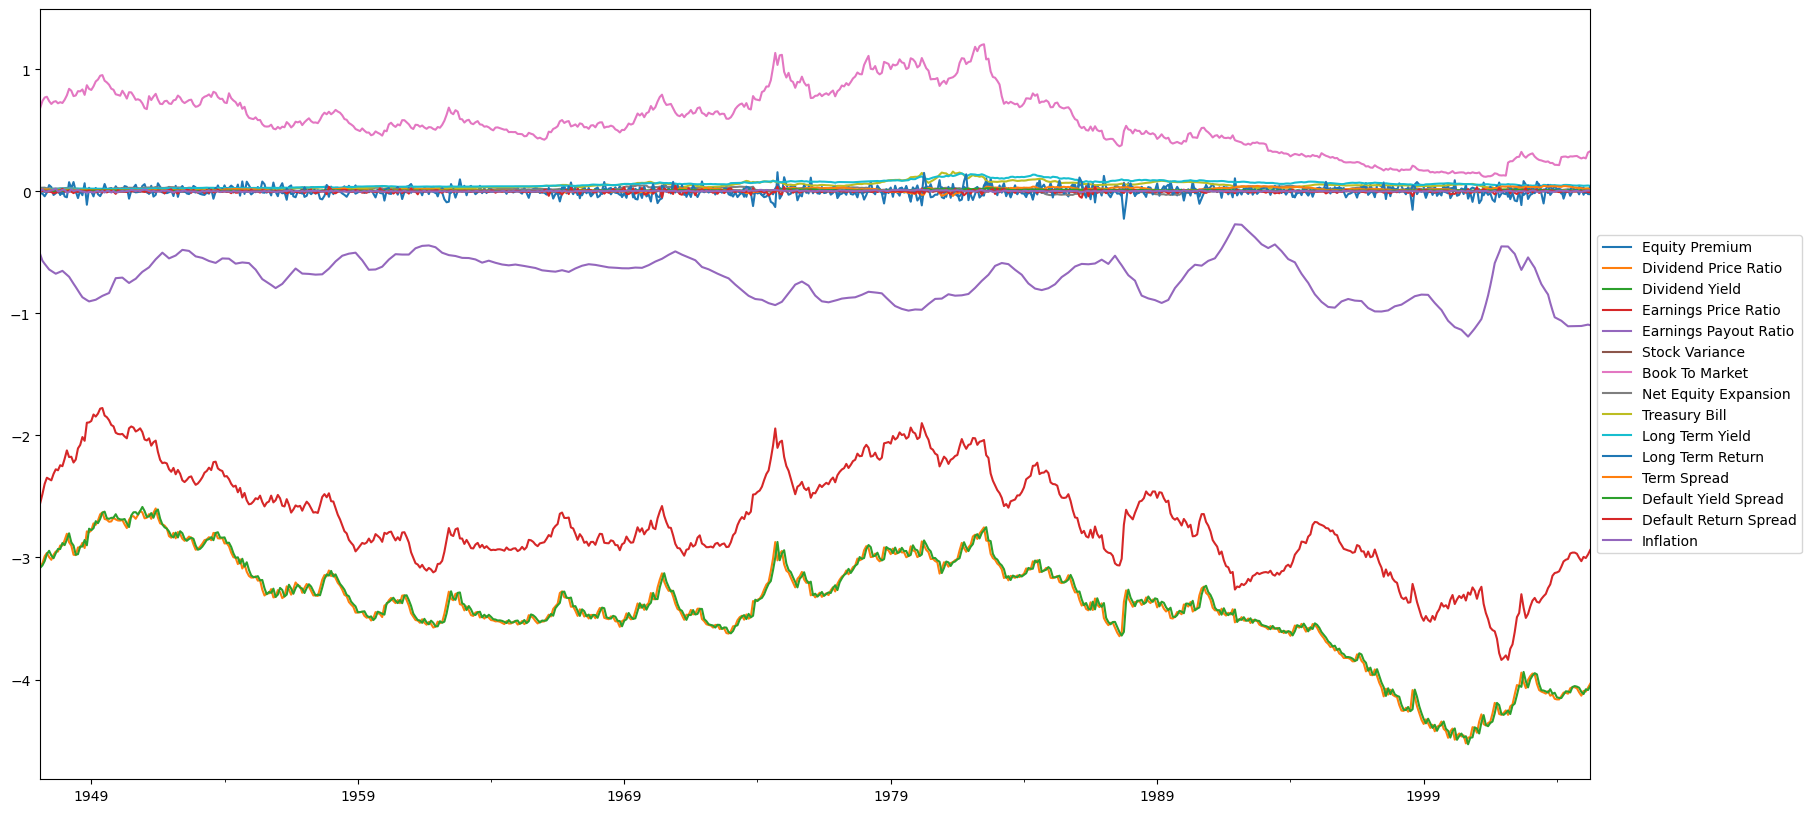

In [141]:
econ_predictors.plot(figsize = (20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

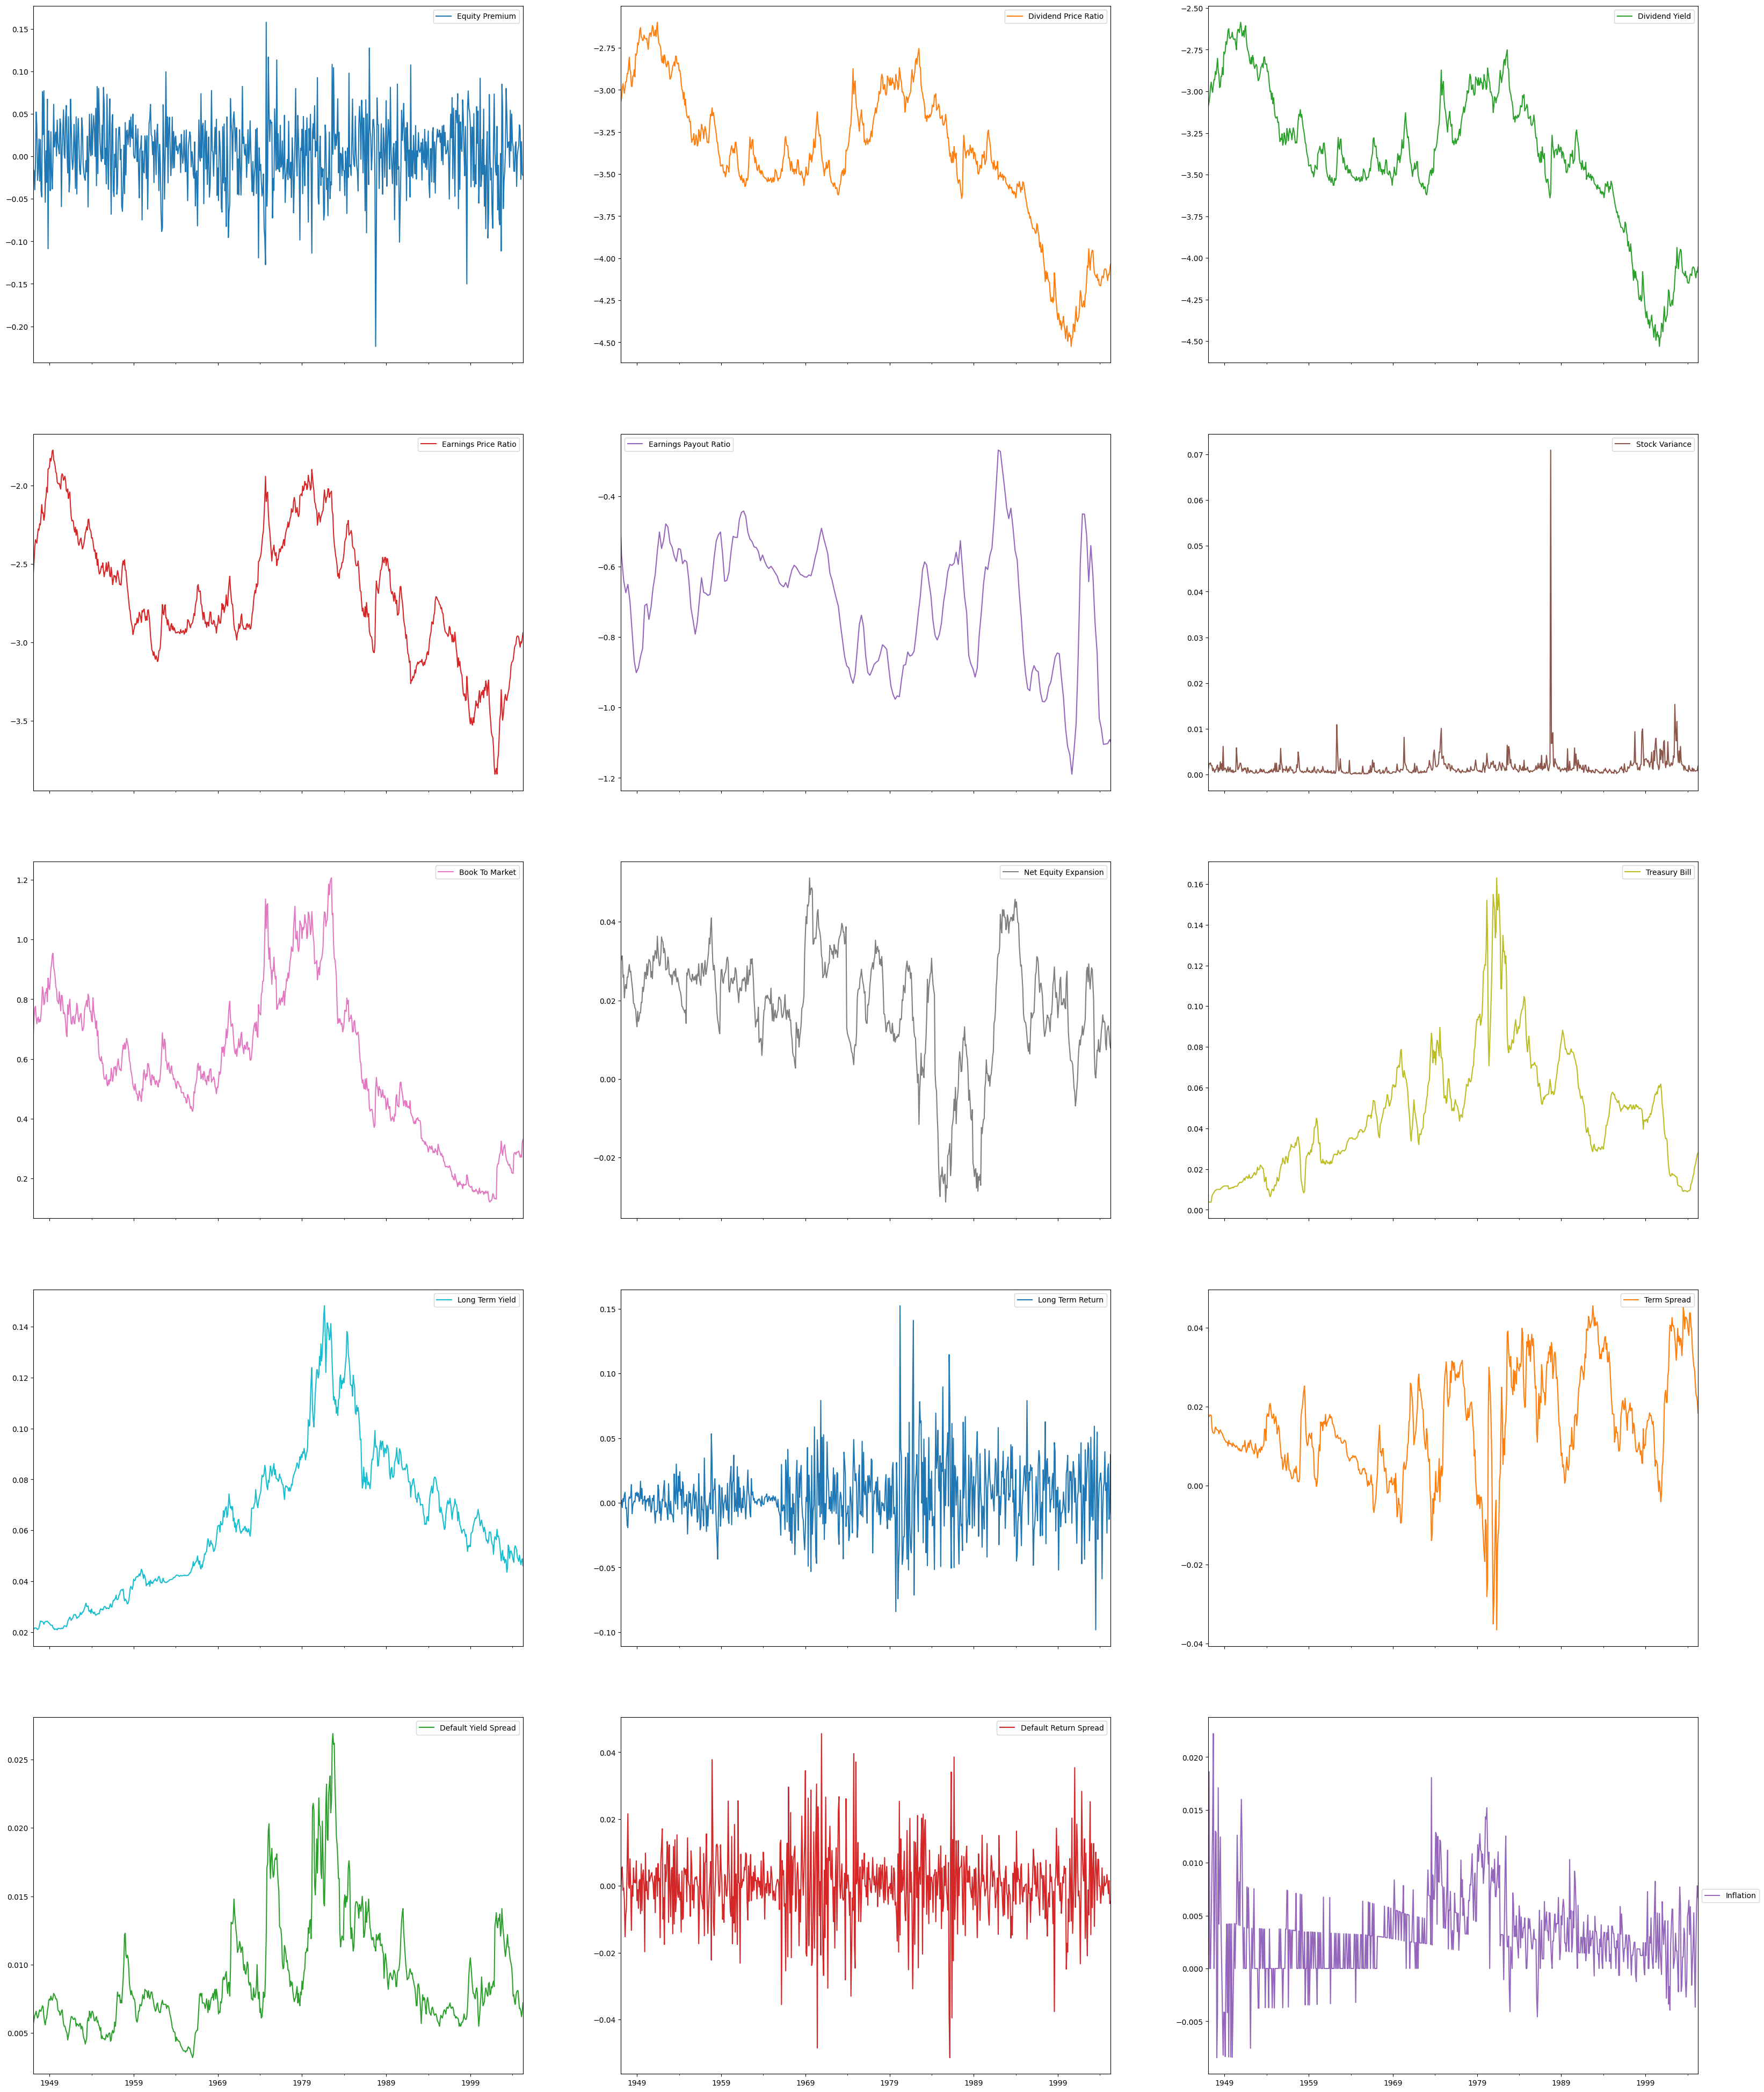

In [145]:
econ_predictors.plot(subplots = True,
                        use_index = True,
                        fontsize = 10,
                        layout = (5,3), 
                        figsize = (40,50))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

wrap up into a function